# Reading the cleaned data

In [ ]:
df <- read.csv("speeddatingCleaned.csv", TRUE)
numericalVariablesPosition <- c(3,8,9,10,14,15,16,17,18,19,20,21,22)
names(df[numericalVariablesPosition])

[1] "d_age"                "attractive_o"         "sinsere_o"           
 [4] "intelligence_o"       "attractive"           "sincere"             
 [7] "intelligence"         "attractive_partner"   "intelligence_partner"
[10] "sincere_partner"      "interests_correlate"  "like"                
[13] "guess_prob_liked"

# Plotting the dendogram for the distance of numerical variables


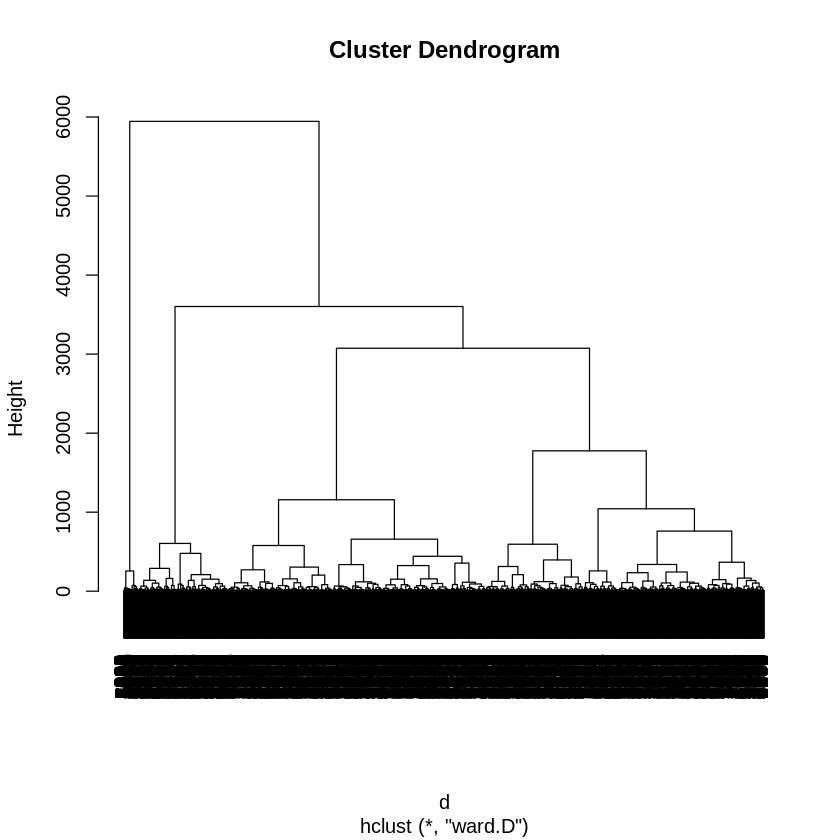

In [ ]:
#calculate the distance of numerical Variables
d <- dist(df[numericalVariablesPosition])

#calculate the dendogram
h1 <- hclust(d,method="ward.D")
plot(h1)

As we can see, for the cut, we will do it with 2 clusters, because is the larger part and the objective variable is binary.

### Make the cut

In [ ]:
nc = 2

c1 <- cutree(h1,nc)

### Looking for variables that make easy to separate the 2 groups

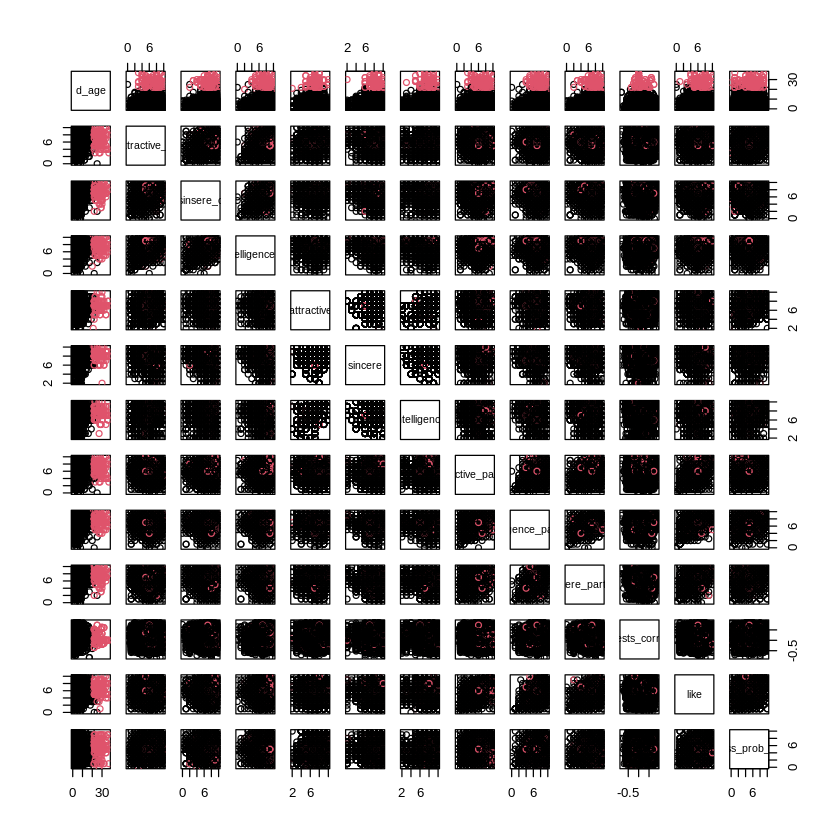

In [ ]:
pairs(df[,numericalVariablesPosition], col=c1)

As we can see, the best variable that will help us to separate correctly the data in the 2 clusters is "d_age" because as we can see in the plots, when it is in the X axis, we can appreciate 2 sides. One side between 0 and 18 in black colour, that means it is one of the clusters and the other side between 19 and 30 with red colour, that means is the other cluster. So the majority of the individuals of one cluster are between 0 and 18 and the majority of individuals of the other cluster are between 19 and 30.

Another thing that we can see is if we ahve a look on the plot with the variables "interest_correlated" and "d_age", we can see the separation that I mentioned wit the "d_age" and a piramid, it means that when the difference of ages increases, the interest that they have in common decreases because they are more near to 0, specially when we see the pink cluster.

The last thing that I can see if we have a look on the plots with "d_age" and the other variables in the other axis, We can appreciate that the pink cluster usually have better puntuation in the variables that are ratings (thoose are all the numerical variables excepts "d_age", "interest_correlated" and "guess_prob_loked") than in the black cluster. I mean, in the pink cluster (with higher ages) the minimum puntuation of the majority of the pink cluster members are higher than the black cluster with less different ages. For example, if we have a look in "sinsere" and "d_age" variables, for the pink cluster with more different of ages between the partner, the puntuation for the sincerity of itself is between 6 to 10, but with more similar ages in the black cluster, the rating is between 2 to 10. There are 4 points of difference in the minimum puntuation of both clusters. This is the more extremly case, but with the other variables happends the same (the minimum rating is higher in the majority of the members in the pink cluster than in the majority of members in the black cluster).

# Plotting the dendogram for the distance matrix for numerical variables

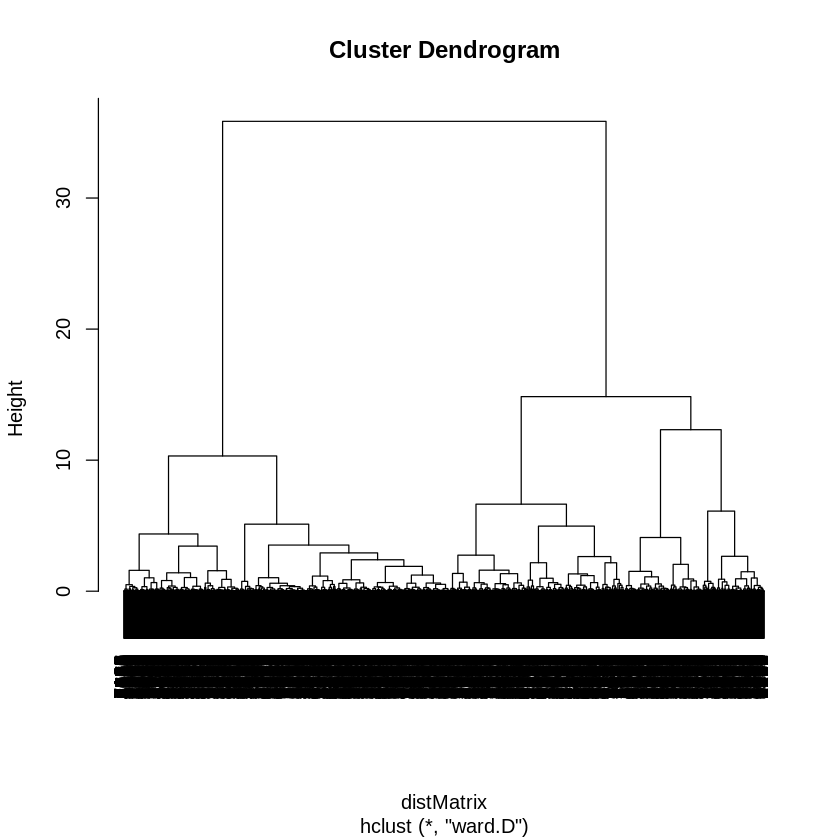

In [ ]:
#Creating the distance matrix
library(cluster)
dissimMatrix <- daisy(df[,numericalVariablesPosition], metric = "gower", stand=TRUE)
distMatrix<-dissimMatrix^2

#Ploting the dendogram
h2 <- hclust(distMatrix,method="ward.D")
plot(h2)

As we can see, to make a cut in the dendogram, as the other dendogram, the larger distance is with 2 clusters. We are going to have 2 clusters by this reason and because we have a binary variable as the objective variable. 

### Make the cut

In [ ]:
c2 <- cutree(h2,2)

### Looking for variables that make easy to separate the 2 groups

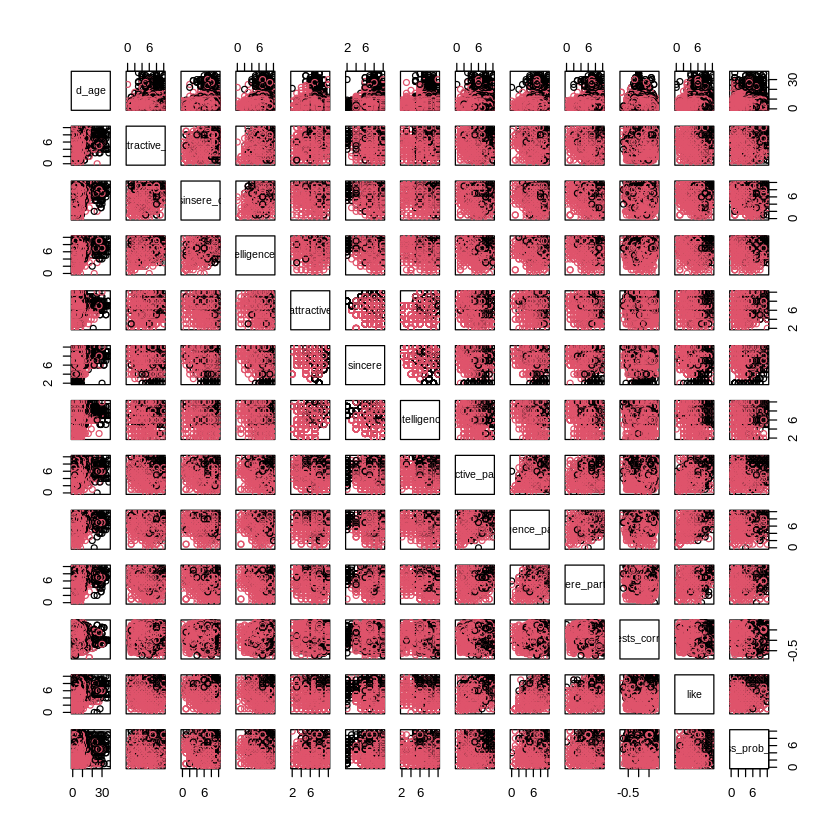

In [ ]:
pairs(df[,numericalVariablesPosition], col=c2)

As we can see, it happends like in the other representation. The best variable to separate the data in two clusters is "d_age" because the pink and black cluster are more or less separated. The majority of the members in the pink cluster are on the left side and the majority of the members in the black cluster are in the middle-right side. But, this is worse separeted than in the other, but we can see some patterns:

When "d_age" is in the X axis, we usually found the majority of pink cluster in the left side and the black individuals in the middle-rigth side. We can see it better when the Y axis is one of the next variables: "attractive_o","sinsere_o","intelligence_o" "intelligence_partner" and "sincere_partner". And with this variables, we can see as the other representation, that the minimum value of the majority of the memebers in the black cluster is lower than the minimum value of the majority of the members in black cluster.

The last thing I'll mention is that we can appreciate a diagonal separation (top-left to bottom-rigt) if we look with the variable "guess_prob_likes" and "d_age". If we look down the diagonal, we can see the majority of individuals in pink cluster and if we look above the diagonal, we can see the majority of the individuals in black cluster. This diagonal means for the members of the pink cluster that when the difference of ages increases, the rating about what do you think about the other person liked you decreases and for the members in the black cluster: when the difference of ages decreases, the rating about what do you think about the other person liked you, increases.

In [ ]:
### No se presenta

#Third Clustering with distMatrix and num+cat vars
#library(cluster)
#variablesNonBinary <- c(3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
#df[,3] <- as.numeric(df[,3])
#dissimMatrix <- daisy(df[,variablesNonBinary], metric = "gower", stand=TRUE)
#distMatrix<-dissimMatrix^2

#h3 <- hclust(distMatrix,method="ward.D")
#plot(h3)

#c3 <- cutree(h2,4)

#pairs(df[,variablesNonBinary], col=c3)